In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [29]:

# Load the min-max normalized cricket data
cricket_data = pd.read_csv('C:/Users/Shrutika Jori/OneDrive/Desktop/data science/cricket_data.csv')

cricket_data = cricket_data.fillna(cricket_data.median())

cricket_data.head(5)


C:\Users\Shrutika Jori\AppData\Local\Temp\ipykernel_26392\1426189499.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cricket_data = cricket_data.fillna(cricket_data.median())


,Player,Span,Matches,Innings,Not Out,Runs Scored,Highest Score,Average,Bowls Faced,Strike Rate,100,50,0,4s,6s,Economy Rate,Maidens Bowled,Wickets Taken
0,V Kohli (IND),2012-2022,0.636364,0.633333,0.785714,1.000000,0.626374,0.912916,1.000000,0.706442,0.0,1.000000,0.0,0.921569,0.416667,0.445055,0.333333,0.277778
1,DPMD Jayawardene (SL),2007-2014,0.757576,0.833333,0.357143,0.877930,0.747253,0.371924,0.849869,0.726643,0.5,0.428571,0.2,1.000000,0.366667,0.445055,0.333333,0.277778
2,CH Gayle (WI),2007-2021,0.818182,0.833333,0.214286,0.828125,0.934066,0.313145,0.748042,0.773680,1.0,0.500000,0.2,0.676471,1.000000,0.445055,0.333333,0.277778
3,RG Sharma (IND),2007-2022,1.000000,1.000000,0.571429,0.826172,0.516484,0.312253,0.848564,0.686359,0.0,0.642857,0.2,0.803922,0.533333,0.445055,0.333333,0.277778
4,TM Dilshan (SL),2007-2016,0.878788,0.933333,0.357143,0.761719,0.703297,0.268137,0.809399,0.663926,0.0,0.428571,1.0,0.901961,0.283333,0.445055,0.333333,0.277778


In [30]:

from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

Finding best 11 players

In [31]:
X = cricket_data[['Matches','Highest Score','Average','Strike Rate','100','Runs Scored','Wickets Taken','Innings','Not Out','50','0','4s','6s','Maidens Bowled']]
y = cricket_data[['Matches','Highest Score','Average','Strike Rate','100','Runs Scored','Wickets Taken','Innings','Not Out','50','0','4s','6s','Maidens Bowled']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a MultiOutput Random Forest regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Predict the runs scored and batting average for each player in the test set
y_pred = model.predict(X_test)

# Calculate the overall score for each player based on all parameters
overall_score = y_pred.sum(axis=1)

# Select the top 11 players based on overall score
top_11_players = X_test.iloc[overall_score.argsort()[::-1][:11], :]

# Print the names of the top 11 players
names = cricket_data.iloc[top_11_players.index]['Player']
print(names)

16             AD Hales (ENG)
35            LJ Wright (ENG)
19           EJG Morgan (ENG)
9          KS Williamson (NZ)
29           Umar Akmal (PAK)
30            AD Mathews (SL)
24             MS Dhoni (IND)
18           LRPL Taylor (NZ)
15         KP Pietersen (ENG)
42     Mohammad Shahzad (AFG)
148             DW Steyn (SA)
Name: Player, dtype: object


Finding best 11 players by passing required parameters 

In [32]:


X = cricket_data[['Matches','Highest Score','Average','Strike Rate','100','Runs Scored','Wickets Taken','Innings','Not Out','50','0','4s','6s','Maidens Bowled']]
y = cricket_data[['Matches','Average']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a MultiOutput Random Forest regression model
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Predict the runs scored and batting average for each player in the test set
y_pred = model.predict(X_test)

# Calculate the overall score for each player based on matches and batting average
overall_score = y_pred[:,0] + y_pred[:,1]

# Select the top 11 players based on overall score
top_11_players = X_test.iloc[overall_score.argsort()[::-1][:11], :]

# Print the names of the top 11 players
names = cricket_data.iloc[top_11_players.index]['Player']
print(names)

24          MS Dhoni (IND)
30         AD Mathews (SL)
19        EJG Morgan (ENG)
18        LRPL Taylor (NZ)
9       KS Williamson (NZ)
29        Umar Akmal (PAK)
16          AD Hales (ENG)
165        AU Rashid (ENG)
35         LJ Wright (ENG)
45     Misbah-ul-Haq (PAK)
15      KP Pietersen (ENG)
Name: Player, dtype: object


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Finding Highest Wicket taker

In [34]:
# Modify X and y to only include wickets-related columns
X = cricket_data[['Wickets Taken','Maidens Bowled']]
y = cricket_data['Wickets Taken']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the wickets taken for each player in the test set
y_pred = model.predict(X_test)

# Find the index of the player with the highest wickets taken
highest_wicket_taker_index = y_test.idxmax()

# Print the name of the player with the highest wickets taken
print(cricket_data.iloc[highest_wicket_taker_index]['Player'])



R Ashwin (IND)


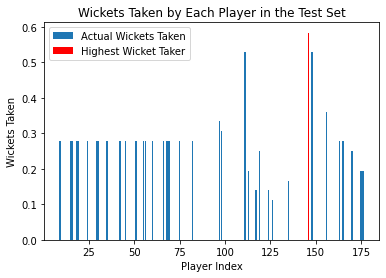

In [35]:
import matplotlib.pyplot as plt

# Plot a bar chart of the wickets taken by each player in the test set
plt.bar(X_test.index, y_test, label='Actual Wickets Taken')
plt.bar(highest_wicket_taker_index, y_test.loc[highest_wicket_taker_index], color='r', label='Highest Wicket Taker')

# Add axis labels and a title to the plot
plt.xlabel('Player Index')
plt.ylabel('Wickets Taken')
plt.title('Wickets Taken by Each Player in the Test Set')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


Finding Highest runs scorer

In [36]:

# Modify X and y to only include runs-related columns
X = cricket_data[['Matches', 'Highest Score', 'Average', 'Strike Rate', '100', 'Runs Scored', 'Innings', 'Not Out', '50', '0', '4s', '6s']]
y = cricket_data['Highest Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the runs scored for each player in the test set
y_pred = model.predict(X_test)

# Find the index of the player with the highest runs scored
highest_scorer_index = np.argmax(y_pred)

# Print the name of the player with the highest runs scored
print(cricket_data.iloc[highest_scorer_index]['Player'])


KP Pietersen (ENG)


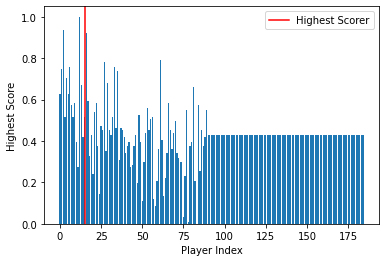

In [37]:
import matplotlib.pyplot as plt

# Find the index of the player with the highest runs scored
highest_scorer_index = y_pred.argmax()

# Plot a bar chart of the highest scorer
plt.bar(cricket_data.index, cricket_data['Highest Score'])
plt.axvline(x=highest_scorer_index, color='red', label='Highest Scorer')
plt.xlabel('Player Index')
plt.ylabel('Highest Score')
plt.legend()
plt.show()


Finding a Player to hit most Sixes

In [38]:
# Modify X and y to only include runs-related columns
X = cricket_data[['Matches', 'Highest Score', 'Average', 'Strike Rate', '100', 'Runs Scored', 'Innings', 'Not Out', '50', '0', '4s', '6s']]
y = cricket_data['6s']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the runs scored for each player in the test set
y_pred = model.predict(X_test)

# Find the index of the player 
highest_scorer_index = np.argmax(y_pred)

# Print the name of the player with the highest runs scored
print(cricket_data.iloc[highest_scorer_index]['Player'])

Tamim Iqbal (BAN)


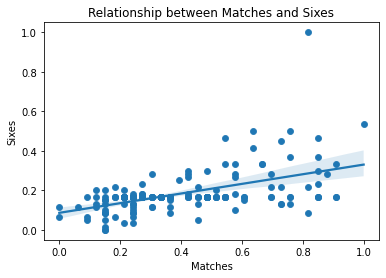

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns from the data
cricket_data_subset = cricket_data[['Matches', '6s']]

# Create a scatter plot of the data
sns.scatterplot(x='Matches', y='6s', data=cricket_data_subset)

# Add a linear regression line to the scatter plot
sns.regplot(x='Matches', y='6s', data=cricket_data_subset)

# Add labels and title
plt.xlabel('Matches')
plt.ylabel('Sixes')
plt.title('Relationship between Matches and Sixes')

# Display the chart
plt.show()


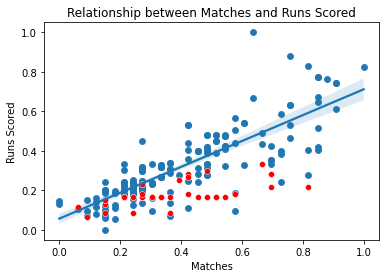

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns from the data
cricket_data_subset = cricket_data[['Matches', 'Runs Scored']]

# Create a scatter plot of the data
sns.scatterplot(x='Matches', y='Runs Scored', data=cricket_data_subset)

# Add a linear regression line to the scatter plot
sns.regplot(x='Matches', y='Runs Scored', data=cricket_data_subset)

# Modify X and y to only include runs-related columns
X = cricket_data[['Matches', 'Highest Score', 'Average', 'Strike Rate', '100', 'Runs Scored', 'Innings', 'Not Out', '50', '0', '4s', '6s']]
y = cricket_data['6s']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the predicted values from the model
y_pred = model.predict(X_test)

# Add the predicted values to the scatter plot
sns.scatterplot(x=X_test['Matches'], y=y_pred, color='red')

# Add labels and title
plt.xlabel('Matches')
plt.ylabel('Runs Scored')
plt.title('Relationship between Matches and Runs Scored')

# Display the chart
plt.show()


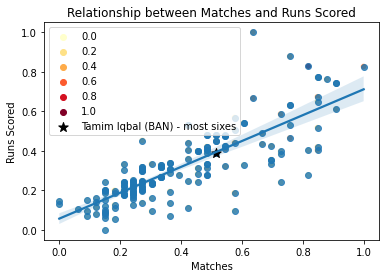

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns from the data
cricket_data_subset = cricket_data[['Matches', 'Runs Scored', '6s']]

# Create a scatter plot of the data
sns.scatterplot(x='Matches', y='Runs Scored', data=cricket_data_subset, hue='6s', palette='YlOrRd')

# Add a linear regression line to the scatter plot
sns.regplot(x='Matches', y='Runs Scored', data=cricket_data_subset)

# Add labels and title
plt.xlabel('Matches')
plt.ylabel('Runs Scored')
plt.title('Relationship between Matches and Runs Scored')

# Get the name of the player with the most sixes
player_with_most_sixes = cricket_data.iloc[y_pred.argmax()]['Player']

# Highlight the player with the most sixes on the plot
player_index = cricket_data[cricket_data['Player'] == player_with_most_sixes].index[0]
plt.scatter(cricket_data_subset.iloc[player_index]['Matches'], cricket_data_subset.iloc[player_index]['Runs Scored'], s=100, marker='*', color='black', label=f'{player_with_most_sixes} - most sixes')

# Add legend to the plot
plt.legend()

# Display the chart
plt.show()


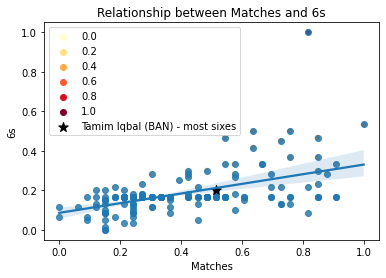

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns from the data
cricket_data_subset = cricket_data[['Matches', '6s']]

# Create a scatter plot of the data
sns.scatterplot(x='Matches', y='6s', data=cricket_data_subset, hue='6s', palette='YlOrRd')

# Add a linear regression line to the scatter plot
sns.regplot(x='Matches', y='6s', data=cricket_data_subset)

# Get the name of the player with the most sixes
player_with_most_sixes = cricket_data.iloc[y_pred.argmax()]['Player']

# Highlight the player with the most sixes on the plot
player_index = cricket_data[cricket_data['Player'] == player_with_most_sixes].index[0]
plt.scatter(cricket_data_subset.iloc[player_index]['Matches'], cricket_data_subset.iloc[player_index]['6s'], s=100, marker='*', color='black', label=f'{player_with_most_sixes} - most sixes')

# Add labels and title
plt.xlabel('Matches')
plt.ylabel('6s')
plt.title('Relationship between Matches and 6s')

# Add legend to the plot
plt.legend()

# Display the chart
plt.show()


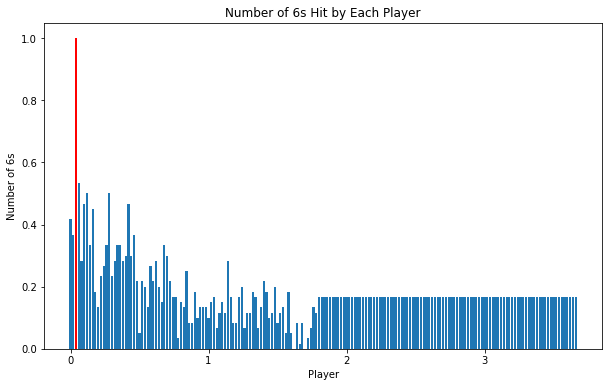

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Form intervals for the x-axis ticks
interval = 50
ticks = np.arange(0, cricket_data.shape[0], interval)
labels = np.arange(ticks.size)

# Plot a bar chart of the number of 6s hit by each player
plt.figure(figsize=(10, 6))
plt.bar(x=cricket_data.index, height=cricket_data['6s'])

# Highlight the player with the highest number of 6s in red
highest_scorer_index = np.argmax(cricket_data['6s'])
plt.bar(x=highest_scorer_index, height=cricket_data.loc[highest_scorer_index]['6s'], color='red')

# Set the title and axis labels
plt.title('Number of 6s Hit by Each Player')
plt.xlabel('Player')
plt.ylabel('Number of 6s')

# Set the x-axis tick labels to be the player indices
plt.xticks(ticks=ticks, labels=labels)

plt.show()


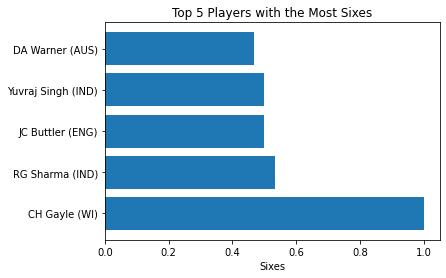

In [ ]:
import matplotlib.pyplot as plt

# Get the top 5 players with the most sixes
top_5 = cricket_data.nlargest(5, '6s')

# Create the bar chart
plt.barh(top_5['Player'], top_5['6s'], align='center')

# Add labels and title
plt.xlabel('Sixes')
plt.title('Top 5 Players with the Most Sixes')

# Display the chart
plt.show()


Finding The bowler who bowled the most maidens over

In [ ]:
# Select the relevant columns from the data
bowling_data = cricket_data[['Player', 'Maidens Bowled']]

# Sort the data by the number of maidens bowled in descending order
bowling_data_sorted = bowling_data.sort_values(by='Maidens Bowled', ascending=False)

# Get the name of the bowler who bowled the most maidens over
highest_maiden_bowler = bowling_data_sorted.iloc[0]['Player']

print(f'The bowler who bowled the most maidens over is {highest_maiden_bowler}')


The bowler who bowled the most maidens over is Mohammad Amir (PAK)


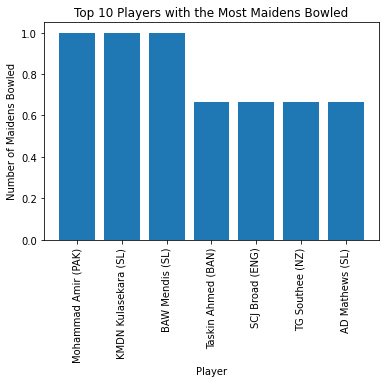

In [44]:
import matplotlib.pyplot as plt

# Select the relevant columns from the data
bowling_data = cricket_data[['Player', 'Maidens Bowled']]

# Sort the data by the number of maidens bowled in descending order
bowling_data_sorted = bowling_data.sort_values(by='Maidens Bowled', ascending=False)

# Get the top 10 players with the most maidens bowled
top_10_maiden_bowlers = bowling_data_sorted.head(10)

# Plot the bar chart
plt.bar(top_10_maiden_bowlers['Player'], top_10_maiden_bowlers['Maidens Bowled'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Number of Maidens Bowled')
plt.title('Top 10 Players with the Most Maidens Bowled')
plt.show()


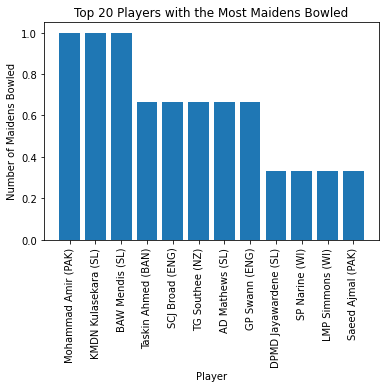

In [51]:
import matplotlib.pyplot as plt

# Select the relevant columns from the data
bowling_data = cricket_data[['Player', 'Maidens Bowled']]

# Sort the data by the number of maidens bowled in descending order
bowling_data_sorted = bowling_data.sort_values(by='Maidens Bowled', ascending=False)

# Get the top 20 players with the most maidens bowled
top_20_maiden_bowlers = bowling_data_sorted.head(20)

# Plot the bar chart
plt.bar(top_20_maiden_bowlers['Player'], top_20_maiden_bowlers['Maidens Bowled'])
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Number of Maidens Bowled')
plt.title('Top 20 Players with the Most Maidens Bowled')
plt.show()
